<a href="https://colab.research.google.com/github/dey-hritam/ML-Projects/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
##PACKAGES:-

%matplotlib inline
!pip install -q gradio               # installing gradio

import numpy as np                   # advanced math library
import matplotlib.pyplot as plt      # MATLAB like plotting routines
import random                        # for generating random numbers
import gradio as gr

import tensorflow as tf
from keras.datasets import mnist     # MNIST dataset is included in Keras
from keras.models import Sequential  # Model type to be used

from keras.layers import Dense, Flatten, Softmax # Types of layers to be used in our model



In [58]:

(x_train,y_train),(x_test,y_test)=mnist.load_data()
print("x_train shape:",x_train.shape)
print("y_train shape:",y_train.shape)
print("x_test shape:",x_test.shape)
print("y_test shape:",y_test.shape)




x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


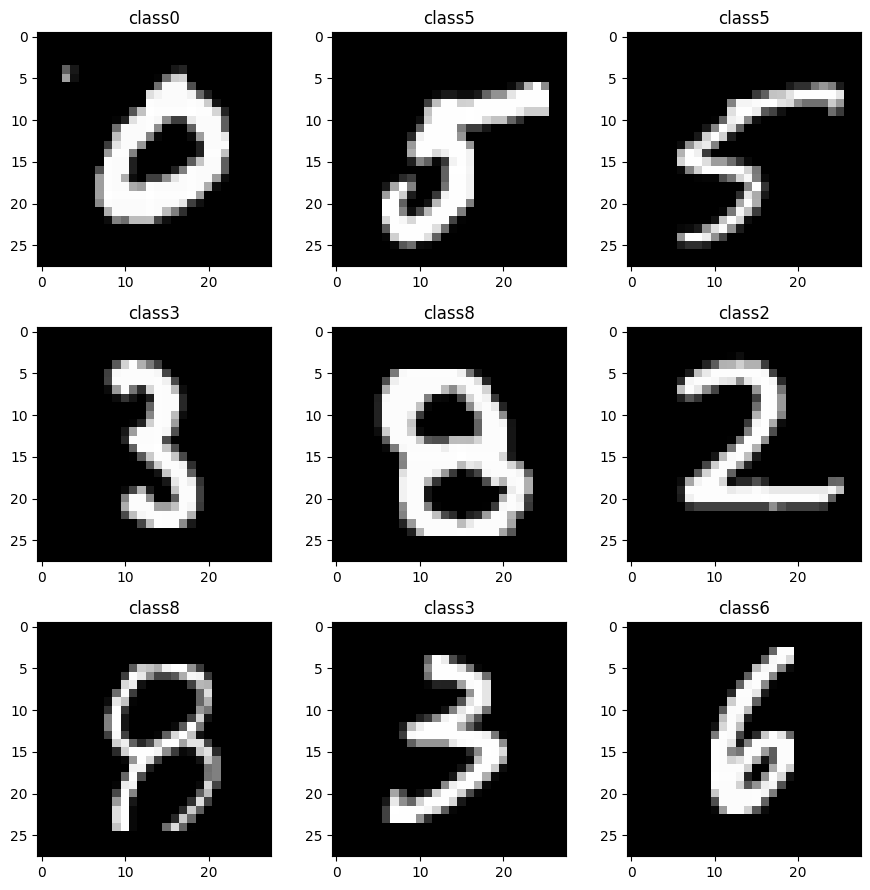

In [59]:

plt.rcParams['figure.figsize'] = (9,9) #Define the size of the plot

for i in range(9):
  plt.subplot(3,3,i+1)
  num=random.randint(0,len(x_train))
  plt.imshow(x_train[num],cmap='gray',interpolation='none')
  plt.title("class{}".format(y_train[num]))

plt.tight_layout()

In [60]:

# just a little function for pretty printing a matrix
# we can ignore it if we want
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

matprint(x_train[num])



0  0  0  0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0    0    0    0    0    0    0    0  101  253  253  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0    0    0    0    0    0    0  100  247  252  217  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0    0    0    0    0    0  189  247  251  134   12  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0    0    0    0    0   98  253  252  134    0    0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0    0    0    0   98  246  253  137    4    0    0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0    0    0   39  253  253  230   27    0    0    0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0    0    0  206  252  252  

In [61]:

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255

print("Trainning Mtrix shape:-",x_train.shape)
print("Testing Mtrix shape:-",x_test.shape)

Trainning Mtrix shape:- (60000, 28, 28)
Testing Mtrix shape:- (10000, 28, 28)


In [62]:

model=Sequential([
    Flatten(input_shape=(28,28)),
    Dense(200,activation='relu',name='L1'),
    Dense(80,activation='relu',name='L2'),
    Dense(10,activation='linear',name='L3'),
])


In [63]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 L1 (Dense)                  (None, 200)               157000    
                                                                 
 L2 (Dense)                  (None, 80)                16080     
                                                                 
 L3 (Dense)                  (None, 10)                810       
                                                                 
Total params: 173,890
Trainable params: 173,890
Non-trainable params: 0
_________________________________________________________________


In [64]:



model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

model.fit(x_train, y_train, batch_size=128, epochs=12, verbose=0)




In [65]:

score=model.evaluate(x_test,y_test)
print(f"Test loss: {score[0]}")
print(f"Test Accuracy:{score[1]}")




313/313 [==============================] - 1s 2ms/step - loss: 0.0807 - accuracy: 0.9803
Test loss: 0.0807310938835144
Test Accuracy:0.9803000092506409


In [66]:
model = Sequential([model, Softmax()])

In [67]:

# The predict_classes function outputs the highest probability class according to the trained classifier for each input example.

predicted_classes=np.argmax(model.predict(x_test),axis=1)

# Check which items we got right / wrong
correct_indices=np.nonzero(predicted_classes == y_test)[0]

incorrect_indices=np.nonzero(predicted_classes != y_test)[0]



313/313 [==============================] - 1s 2ms/step


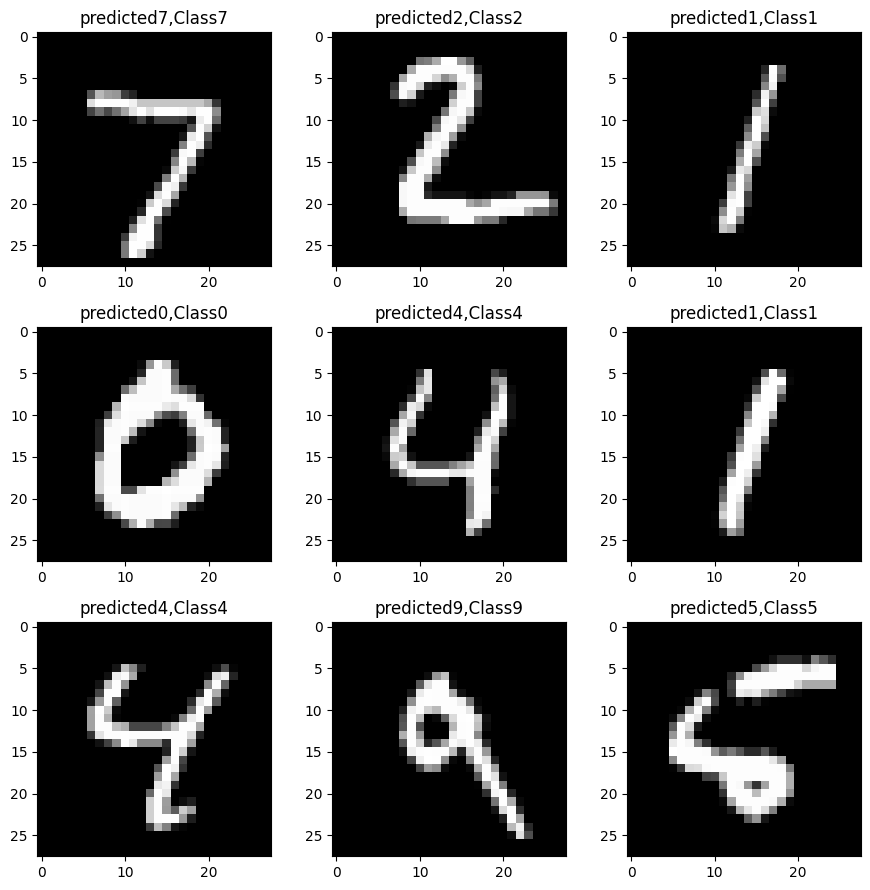

In [68]:

#printing the correct predictions
plt.figure()
for i,correct in enumerate(correct_indices[:9]):
  plt.subplot(3,3,i+1)
  plt.imshow(x_test[correct].reshape(28,28),cmap='gray',interpolation='none')
  plt.title("predicted{},Class{}".format(predicted_classes[correct],y_test[correct]))

plt.tight_layout()



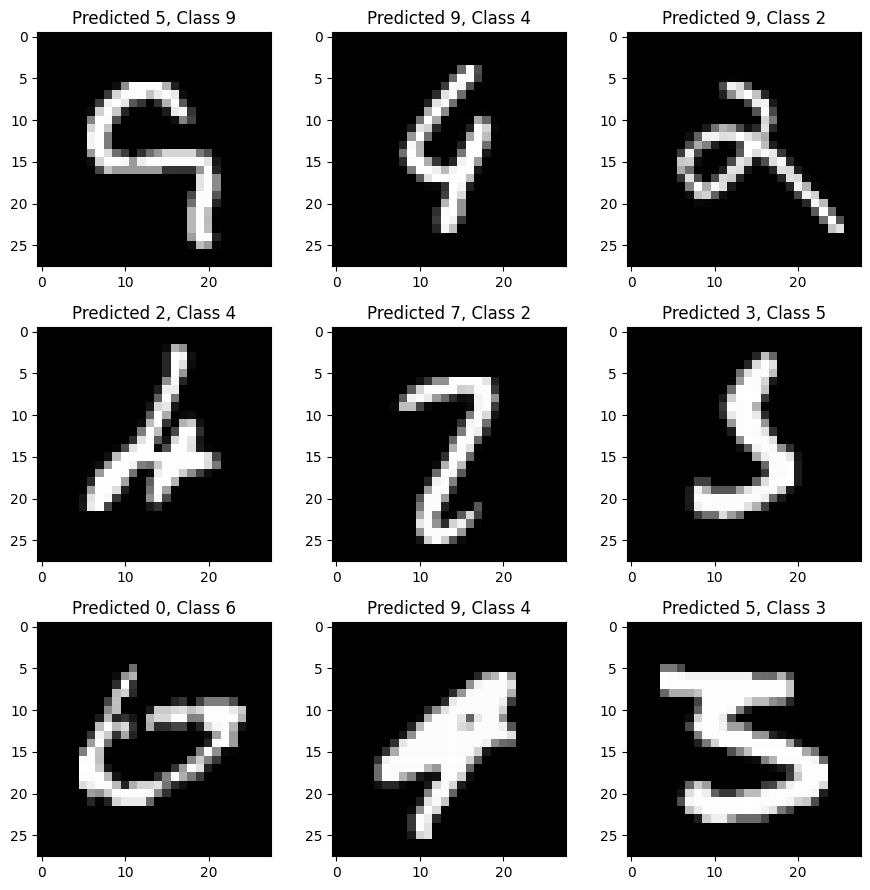

In [69]:
#printing the incorrect predictions
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))

plt.tight_layout()




In [ ]:







def classify(image):
  image = image.reshape(1,784) / 255.0
  prediction = model.predict(image).tolist()[0]
  return {str(i): (prediction[i]) for i in range(10)}

label = gr.outputs.Label(num_top_classes=3)

demo = gr.Interface(fn = classify,
                    inputs= "sketchpad",
                    outputs= label,
                    live=True,
                    title="Digit Recognition on MNIST dataset",
                    description="Draw a number 0 through 9 on the sketchpad, and see predictions in real time.",
                   )

demo.launch(debug= True, share= True)






<ipython-input-70-ebbaf79fc752>:6: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  label = gr.outputs.Label(num_top_classes=3)
<ipython-input-70-ebbaf79fc752>:6: GradioUnusedKwargWarning: You have unused kwarg parameters in Label, please remove them: {'type': 'auto'}
  label = gr.outputs.Label(num_top_classes=3)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://fc083995dc614c1f1c.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 [==============================] - 0s 20ms/step


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/gradio/routes.py", line 488, in run_predict
    output = await app.get_blocks().process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1431, in process_api
    result = await self.call_function(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1109, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "/usr/local/lib/python3.10/dist-packages/anyio/to_thread.py", line 33, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 877, in run_sync_in_worker_thread
    return await future
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 807, in run
    result = context.run(func, *args)
  File "/usr/local/lib/python3.10/dist-packages/gradio/utils.py", line 706, in wrapper
    response = f(*args, **kwargs)
  Fi

1/1 [==============================] - 0s 19ms/step


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/gradio/routes.py", line 488, in run_predict
    output = await app.get_blocks().process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1431, in process_api
    result = await self.call_function(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1109, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "/usr/local/lib/python3.10/dist-packages/anyio/to_thread.py", line 33, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 877, in run_sync_in_worker_thread
    return await future
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 807, in run
    result = context.run(func, *args)
  File "/usr/local/lib/python3.10/dist-packages/gradio/utils.py", line 706, in wrapper
    response = f(*args, **kwargs)
  Fi

1/1 [==============================] - 0s 34ms/step


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/gradio/routes.py", line 488, in run_predict
    output = await app.get_blocks().process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1431, in process_api
    result = await self.call_function(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1109, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "/usr/local/lib/python3.10/dist-packages/anyio/to_thread.py", line 33, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 877, in run_sync_in_worker_thread
    return await future
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 807, in run
    result = context.run(func, *args)
  File "/usr/local/lib/python3.10/dist-packages/gradio/utils.py", line 706, in wrapper
    response = f(*args, **kwargs)
  Fi

1/1 [==============================] - 0s 22ms/step
